# Markov Chains

This notebook demonstrates a simple Markov Chain with three states (e.g., sunny, cloudy, rainy). For an overview of Markov Chains, see [the Wikipedia article](https://en.wikipedia.org/wiki/Markov_chain) on the subject.

First, import some Python packages that will be needed:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

Define the transition matrix $P_{ij}$, which gives the probability of transitioning from state $i$ to state $j$:

In [ ]:
P = np.array([
    [0.7, 0.2, 0.1], # P_{0j}: Probabilities of transitioning from state 0 to j
    [0.3, 0.5, 0.2],
    [0.2, 0.5, 0.3]  # Each row sums to 1
])

As we raise the transition matrix to higher powers, it converges to a limit, in which each column is a constant:

$$
  \lim_{k\rightarrow\infty} P^k =
  \begin{pmatrix}
    p_0 & p_1 & \cdots & p_N \\
    p_0 & p_1 & \cdots & p_N \\
    \vdots & \vdots & \ddots & \vdots \\
    p_0 & p_1 & \cdots & p_N
  \end{pmatrix}
  \, .
$$

In [ ]:
for k in [2, 4, 8, 16]:
    print(f'P^{k}:')
    print(np.linalg.matrix_power(P, k))
    print('')

P^2:
[[0.57 0.29 0.14]
 [0.4  0.41 0.19]
 [0.35 0.44 0.21]]

P^4:
[[0.4899 0.3458 0.1643]
 [0.4585 0.3677 0.1738]
 [0.449  0.3743 0.1767]]

P^8:
[[0.47232201 0.35805557 0.16962242]
 [0.4712458  0.35880593 0.16994827]
 [0.47091995 0.35903312 0.17004693]]

P^16:
[[0.47169885 0.35849005 0.1698111 ]
 [0.47169758 0.35849094 0.16981148]
 [0.4716972  0.3584912  0.1698116 ]]



We can plot the entries of $P^k$, showing how each column converges to a different constant:

In [ ]:
P_k = np.array([np.linalg.matrix_power(P,k) for k in range(10)])

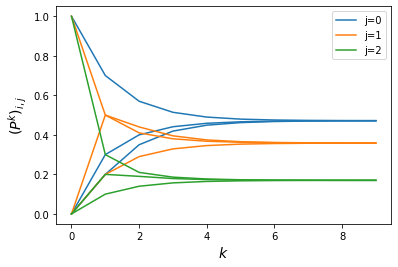

In [ ]:
t = np.arange(P_k.shape[0])

for col in range(P_k.shape[2]):
    l = None
    for row in range(P_k.shape[1]):
        if l is not None:
            c = l.get_color()
            kw = dict(c=c)
        else:
            kw = dict(label=f'j={col}')
        l, = plt.plot(t, P_k[:,row,col], **kw)

plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\left(P^k\right)_{i,j}$', fontsize=14)
plt.legend()
plt.show()

If $\vec{\pi}$ is the stationary distribution, then it is a left eigenvector of $P$, with eigenvalue 1:

$$
    \vec{\pi} P = \vec{\pi} \, .
$$

We can therefore calculate the stationary distribution of the transition matrix by finding the left eigenvector with eigenvalue 1:

In [ ]:
eival, eivec = scipy.linalg.eig(P, left=True, right=False)

# Scipy returns the vector with the largest eigenvalue (1, in this case) first.
# Normalize the eigenvector so that it sums to 1:
state_stationary = eivec[:,0] / np.sum(eivec[:,0])

print(f'Eigenvalue = {np.real(eival[0])}.')
print(f'Stationary distribution: {state_stationary}')

Eigenvalue = 1.0000000000000002.
Stationary distribution: [0.47169811 0.35849057 0.16981132]


Generate a Markov Chain using the transition probabilities and a random starting position:

In [ ]:
n_iterations = 10000 # The number of times to transition

rng = np.random.default_rng() # Initialize the random number generator

chain = [rng.choice(np.arange(P.shape[0]))] # Start in a random state

for k in range(n_iterations):
    # Transition to the next state
    chain.append(rng.choice(np.arange(P.shape[0]), p=P[chain[-1]]))

Print out the first 100 states in the chain:

In [ ]:
print('Chain: ' + ''.join([f'{s}' for s in chain[:100]]) + '...')

Chain: 2000112111200020210000011121002111111001011011002010000211112000222222221002100012221000011121111000...


Calculate the frequency of states in the chain (ignoring the first 1/4 of the chain). This should be close to the stationary distribution:

In [ ]:
_, counts = np.unique(chain[n_iterations//4:], return_counts=True)
frac = counts / np.sum(counts)
print(f'Frequency in chain: {frac}')

Frequency in chain: [0.47873617 0.36021864 0.16104519]
